## 1. Importing Libraries 📚

In [378]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## 2. Reading Data

In [379]:
loan_dataset = pd.read_csv('train_u6lujuX_CVtuZ9i .csv')
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [380]:
loan_dataset.shape

(614, 13)

In [381]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [382]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [383]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

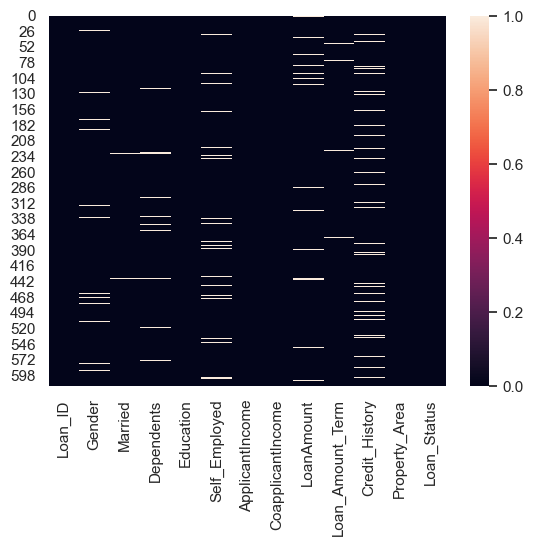

In [384]:
sns.heatmap(loan_dataset.isna())

## 3. Pre-Processing

In [ ]:
loan_dataset.columns

In [385]:
loan_dataset = loan_dataset.drop(['Loan_ID'], axis = 1)

In [386]:
loan_dataset['Gender'].fillna(loan_dataset['Gender'].mode()[0],inplace=True)
loan_dataset['Married'].fillna(loan_dataset['Married'].mode()[0],inplace=True)
loan_dataset['Dependents'].fillna(loan_dataset['Dependents'].mode()[0],inplace=True)
loan_dataset['Self_Employed'].fillna(loan_dataset['Self_Employed'].mode()[0],inplace=True)
loan_dataset['Credit_History'].fillna(loan_dataset['Credit_History'].mode()[0],inplace=True)
loan_dataset['Loan_Amount_Term'].fillna(loan_dataset['Loan_Amount_Term'].mode()[0],inplace=True)

In [387]:
loan_dataset['LoanAmount'].fillna(loan_dataset['LoanAmount'].mean(),inplace=True)

In [388]:
loan_dataset = pd.get_dummies(loan_dataset)

# Drop columns
loan_dataset = loan_dataset.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
loan_dataset.rename(columns=new, inplace=True)

In [389]:
loan_dataset.ApplicantIncome = np.sqrt(loan_dataset.ApplicantIncome)
loan_dataset.CoapplicantIncome = np.sqrt(loan_dataset.CoapplicantIncome)
loan_dataset.LoanAmount = np.sqrt(loan_dataset.LoanAmount)

In [390]:
#loan_dataset = loan_dataset.dropna()

In [391]:
loan_dataset.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender                     0
Married                    0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education                  0
Self_Employed              0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status                0
dtype: int64

<Axes: >

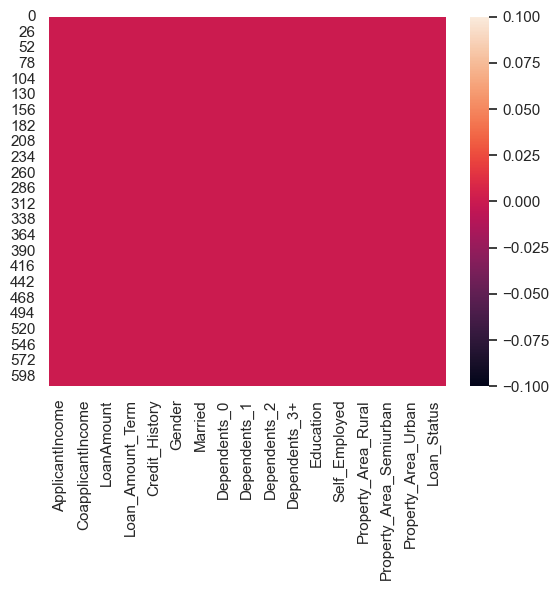

In [392]:
sns.heatmap(loan_dataset.isna())

In [393]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    float64
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Gender                   614 non-null    bool   
 6   Married                  614 non-null    bool   
 7   Dependents_0             614 non-null    bool   
 8   Dependents_1             614 non-null    bool   
 9   Dependents_2             614 non-null    bool   
 10  Dependents_3+            614 non-null    bool   
 11  Education                614 non-null    bool   
 12  Self_Employed            614 non-null    bool   
 13  Property_Area_Rural      614 non-null    bool   
 14  Property_Area_Semiurban  6

In [395]:
#loan_dataset = pd.get_dummies(loan_dataset, columns=['Gender', 'Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'])

In [396]:
#loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [398]:
# convert categorical columns to numerical values
#loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
#                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [399]:
loan_dataset

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,76.478755,0.000000,12.100089,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True
1,67.697858,38.832976,11.313708,360.0,1.0,True,True,False,True,False,False,True,False,True,False,False,False
2,54.772256,0.000000,8.124038,360.0,1.0,True,True,True,False,False,False,True,True,False,False,True,True
3,50.823223,48.559242,10.954451,360.0,1.0,True,True,True,False,False,False,False,False,False,False,True,True
4,77.459667,0.000000,11.874342,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,53.851648,0.000000,8.426150,360.0,1.0,False,False,True,False,False,False,True,False,True,False,False,True
610,64.078077,0.000000,6.324555,180.0,1.0,True,True,False,False,False,True,True,False,True,False,False,True
611,89.844310,15.491933,15.905974,360.0,1.0,True,True,False,True,False,False,True,False,False,False,True,True
612,87.080423,0.000000,13.674794,360.0,1.0,True,True,False,False,True,False,True,False,False,False,True,True


## 4.Data Visualization

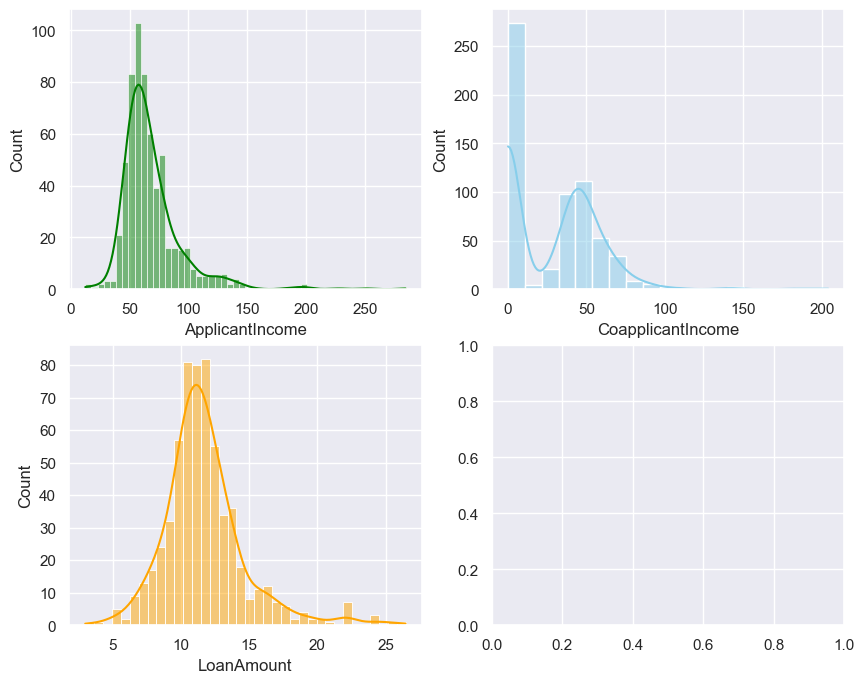

In [401]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=loan_dataset, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=loan_dataset, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=loan_dataset, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

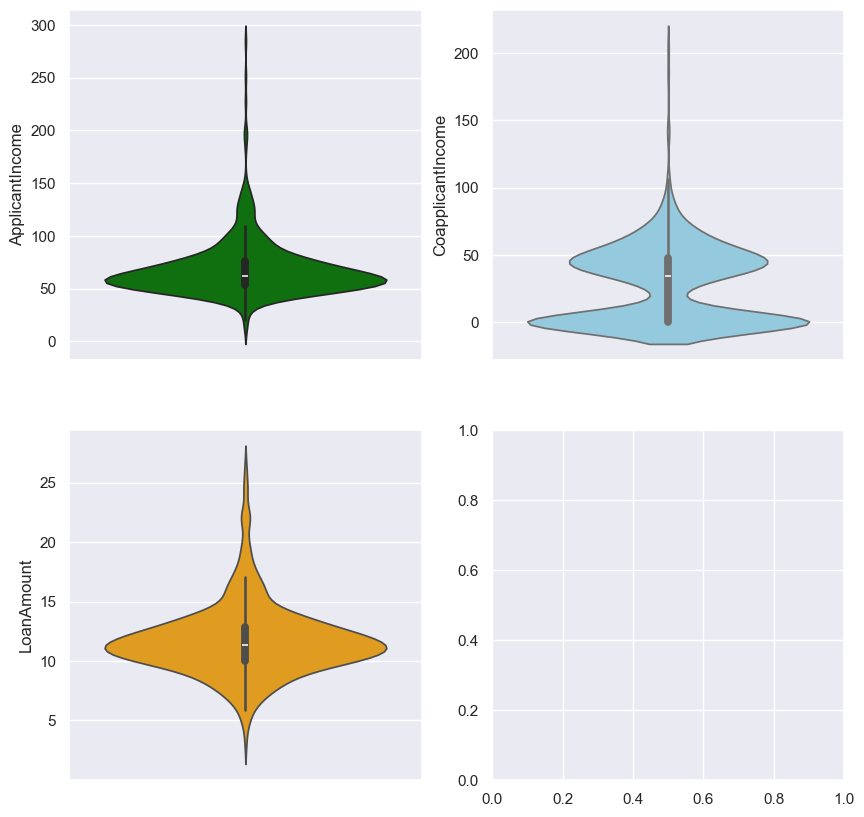

In [402]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(10, 10))

sns.violinplot(data=loan_dataset, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.violinplot(data=loan_dataset, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.violinplot(data=loan_dataset, y="LoanAmount", ax=axs1[1, 0], color='orange');

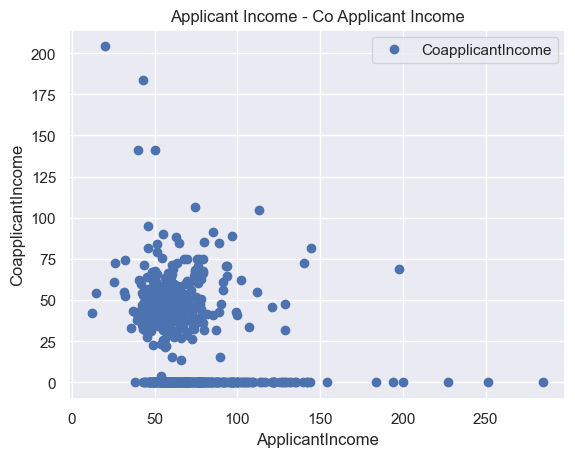

Pearson correlation: -0.27734697724979557
T Test and P value: 
 TtestResult(statistic=25.47746609183236, pvalue=2.9362683348499693e-115, df=1226.0)


In [403]:
loan_dataset.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')  
plt.title('Applicant Income - Co Applicant Income')  
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')  
plt.show()
print('Pearson correlation:', loan_dataset['ApplicantIncome'].corr(loan_dataset['CoapplicantIncome']))
print('T Test and P value: \n', stats.ttest_ind(loan_dataset['ApplicantIncome'], loan_dataset['CoapplicantIncome']))


<Axes: xlabel='Education', ylabel='count'>

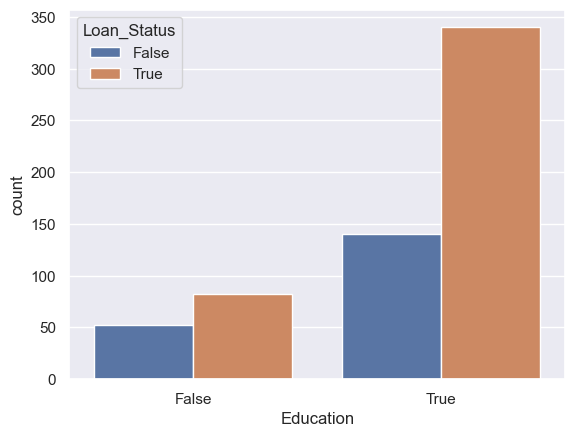

In [404]:
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

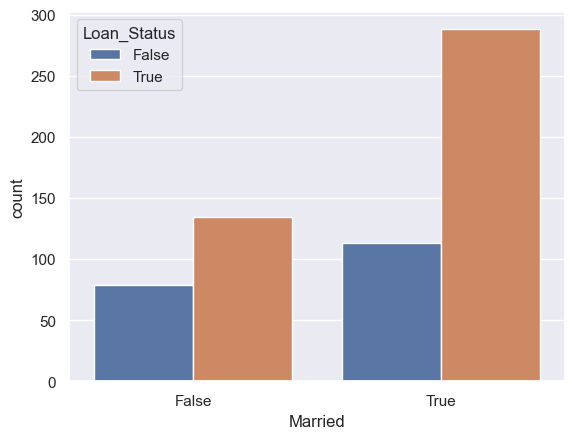

In [405]:
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

## 5.Train / Test Split Data

In [406]:
X = loan_dataset.drop(["Loan_Status"], axis=1)
y = loan_dataset["Loan_Status"]

In [407]:
X, y = SMOTE().fit_resample(X, y)

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_17024\3380082741.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=Y, data=loan_dataset, palette="coolwarm")


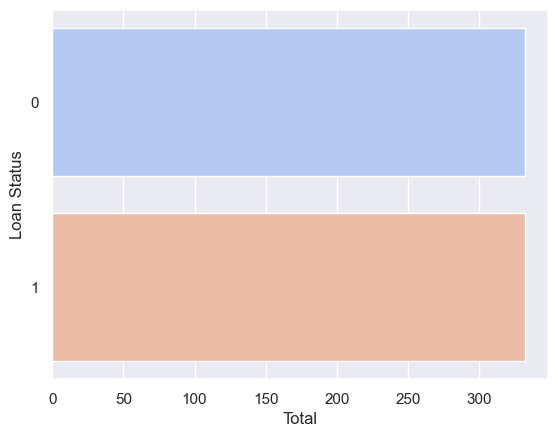

In [408]:
sns.set_theme(style="darkgrid")
sns.countplot(y=Y, data=loan_dataset, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

In [409]:
X = MinMaxScaler().fit_transform(X)

In [410]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [411]:
print(X.shape, X_train.shape, X_test.shape)

(844, 16) (675, 16) (169, 16)


## 6.Creat Model

1 Logistic Regression

In [412]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))


              precision    recall  f1-score   support

       False       0.98      0.66      0.79        86
        True       0.74      0.99      0.85        83

    accuracy                           0.82       169
   macro avg       0.86      0.83      0.82       169
weighted avg       0.86      0.82      0.82       169

[[57 29]
 [ 1 82]]
LR accuracy: 82.25%


2 K-Nearest Neighbour (KNN)

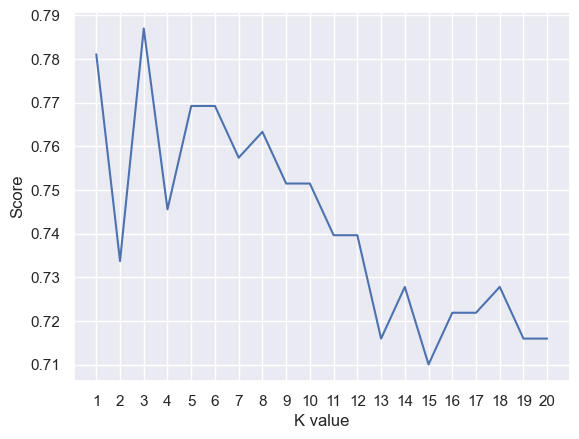

KNN accuracy: 78.70%


In [413]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN accuracy: {:.2f}%".format(KNAcc*100))

3 Support Vector Machine (SVM)

In [414]:
classifier = svm.SVC(kernel='linear')

In [415]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [416]:
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,y_train)

In [417]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.845925925925926


4 Naive Bayes

In [418]:
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Categorical Naive Bayes accuracy: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

       False       0.96      0.60      0.74        86
        True       0.70      0.98      0.82        83

    accuracy                           0.79       169
   macro avg       0.83      0.79      0.78       169
weighted avg       0.84      0.79      0.78       169

[[52 34]
 [ 2 81]]
Categorical Naive Bayes accuracy: 78.70%


4.2 Gaussian NB

In [419]:
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

       False       0.89      0.56      0.69        86
        True       0.67      0.93      0.78        83

    accuracy                           0.74       169
   macro avg       0.78      0.74      0.73       169
weighted avg       0.78      0.74      0.73       169

[[48 38]
 [ 6 77]]
Gaussian Naive Bayes accuracy: 73.96%


5 Random Forest

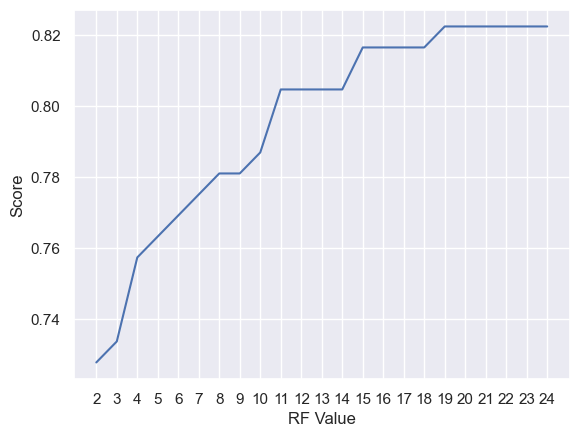

Random Forest Accuracy:  82.25%


In [420]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

6 Decision Tree

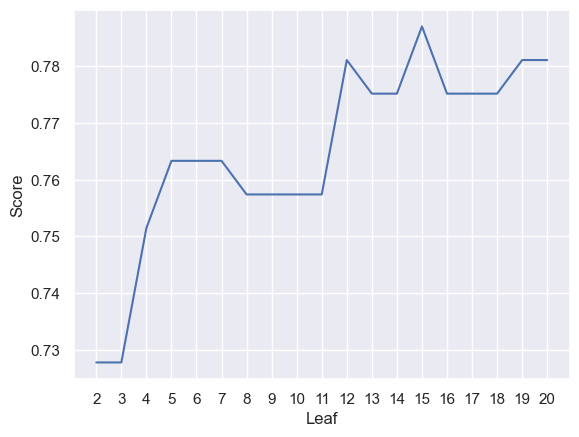

Decision Tree Accuracy: 78.70%


In [421]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

7 Gradient Boosting

In [422]:
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}

In [423]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(X_train, y_train)

RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [424]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_depth=5, max_leaf_nodes=5, n_estimators=200,
                           subsample=0.5)
0.8516488413547239
{'subsample': 0.5, 'n_estimators': 200, 'max_leaf_nodes': 5, 'max_depth': 5}
9


In [425]:
GBclassifier = GradientBoostingClassifier(subsample=0.5, n_estimators=400, max_depth=4, max_leaf_nodes=10)
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

       False       0.84      0.76      0.80        86
        True       0.77      0.86      0.81        83

    accuracy                           0.80       169
   macro avg       0.81      0.81      0.80       169
weighted avg       0.81      0.80      0.80       169

[[65 21]
 [12 71]]
Gradient Boosting accuracy: 80.47%


In [427]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

       False       0.98      0.67      0.80        86
        True       0.75      0.99      0.85        83

    accuracy                           0.83       169
   macro avg       0.86      0.83      0.82       169
weighted avg       0.87      0.83      0.82       169

[[58 28]
 [ 1 82]]
SVC accuracy: 82.84%


c:\Users\Mohamed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


## View all Algorithms

In [429]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 
                                  'SVM', 'Categorical NB', 
                                  'Gaussian NB', 'Decision Tree', 
                                  'Random Forest', 'Gradient Boost'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, 
                                     NBAcc1*100, NBAcc2*100, DTAcc*100, 
                                     RFAcc*100, GBAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,SVM,82.840237
0,Logistic Regression,82.248521
6,Random Forest,82.248521
7,Gradient Boost,80.473373
1,K Neighbors,78.698225
3,Categorical NB,78.698225
5,Decision Tree,78.698225
4,Gaussian NB,73.964497
